In [1]:
import pprint
import numpy as np
import seaborn as sns

from utils import Utils
from pipeline import HsiPipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
folder = '/Users/Usuario/Documents/Pipeline HSI/HyperSI/Plastico B'
samples_dict = Utils.get_dict(samples=Utils.load_samples(folder))

pprint.pprint(samples_dict)

{'Bacillusscereus_14579_Plastico_B_180926-092335': [1],
 'Coryniumbacteriumglutaminum_13032_Plastico_B_180926-093210': [2],
 'Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747': [3],
 'Enterococcusfaecalis_29212_Plastico_B_180926-093958': [4],
 'Klebsielapneumonial_700603_Plastico_B_180926-105913': [5],
 'Micrococcusluteus_9341_Plastico_B_180926-093534': [6],
 'Pseudomonasaeoruginosas_9027_Plastico_B_180926-104046': [7],
 'Salmonellaspp_10708_Plastico_B_180926-104803': [8],
 'Serratiamarcences_14765_Plastico_B_180926-105123': [9]}


In [3]:
pipeline = HsiPipeline(data_folder=folder, samples=samples_dict)

In [4]:
pipeline.process_images()

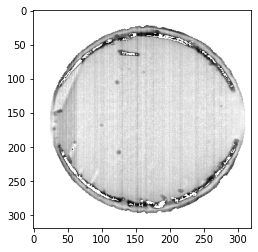

In [5]:
pipeline.visualize_images()

In [4]:
X_train, X_test, y_train, y_test, target_names = pipeline.get_Xy_gram(case=0, spectral_range=(1, 241))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(258037, 240) (258043, 240)
(258037,) (258043,)


In [5]:
models_file = 'models_pipeline_01.joblib'
print(models_file)

models_pipeline_01.joblib


In [6]:
from sklearn import (
    discriminant_analysis,
)

seed = 42
models =[
    discriminant_analysis.LinearDiscriminantAnalysis(covariance_estimator=None, 
                                                     n_components=None,
                                                     priors=None, shrinkage=None, 
                                                     solver='svd',store_covariance=False,
                                                     tol=0.0001),
    discriminant_analysis.QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, 
                                                        store_covariance=False, 
                                                        tol=0.0001),
    ]

for model in models:
    print(model.__class__.__name__)

LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis


LinearDiscriminantAnalysis
               precision    recall  f1-score   support

Gram Positivo       0.97      0.94      0.95     29803
Gram Positivo       0.94      0.86      0.90     30161
Gram Positivo       0.71      0.91      0.80     30078
Gram Positivo       0.95      0.88      0.91     29245
Gram Negativo       0.95      0.92      0.93     30004
Gram Negativo       1.00      0.98      0.99     19771
Gram Negativo       1.00      0.89      0.94     29695
Gram Negativo       0.87      0.90      0.89     29422
Gram Negativo       0.81      0.83      0.82     29864

     accuracy                           0.90    258043
    macro avg       0.91      0.90      0.90    258043
 weighted avg       0.91      0.90      0.90    258043

QuadraticDiscriminantAnalysis
               precision    recall  f1-score   support

Gram Positivo       0.88      0.97      0.92     29803
Gram Positivo       0.70      0.93      0.80     30161
Gram Positivo       0.86      0.76      0.81     30078
Gram

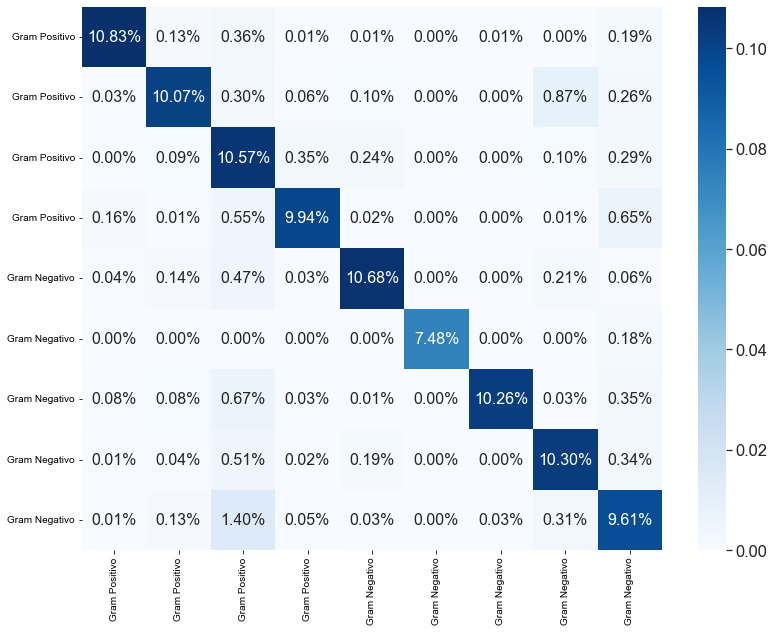

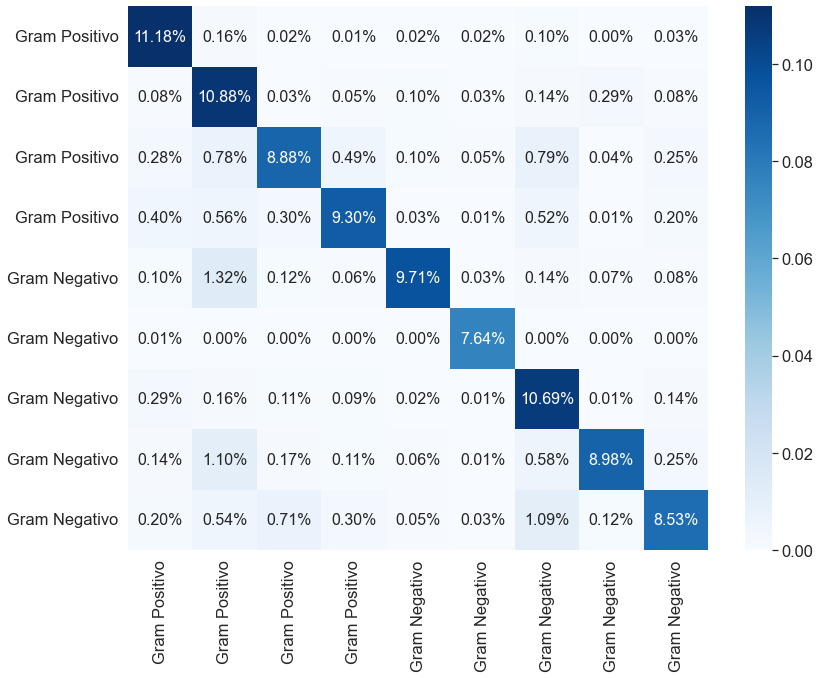

In [7]:
"""
    Everything will be saved in out_dir
"""

out_dir = 'outputs'
pipeline.train_models(x_train=X_train, 
                      x_test=X_test, 
                      y_train=y_train, 
                      y_test=y_test, 
                      models=models,
                      samples_dict=samples_dict,
                      target_names=target_names,
                      models_file=models_file,
                      work_dir=out_dir)